# CtrShiftJ in google images to open console, uncomment & paste to grab urls

In [ ]:
#urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
#window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [ ]:
##check for gpu
##import torch
##torch.cuda.is_available()

In [1]:
from fastai import *
from fastai.widgets import *
from fastai.vision import *
import pandas as pd

np.random.seed(0)

In [2]:
#labels
#url_file='normal.csv'
#url_file='pothole.csv'
#folder = 'normals'
#folder = 'potholes'

Use to make directory with Path()- uses PurePath?
doc(Path)

In [2]:
path = Path('images/road')
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

Download and verify

In [4]:
#download_images(path/url_file, dest, max_pics=200)

In [5]:
#verify_images(path/folder, delete=True, max_size=500)

In [6]:
#doc(verify_images)

Collect/Split/Transform/ -Batchsize

In [3]:
data = ImageDataBunch.from_folder(
    path, train='.',
    valid_pct=0.2,
    ds_tfms=get_transforms(),
    size=224,
    num_workers=1,
    bs=24
).normalize(
    imagenet_stats
)

In [4]:
data.classes

['normals', 'potholes']

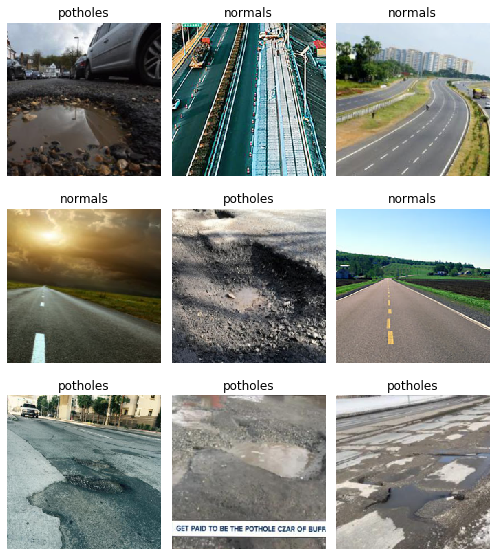

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['normals', 'potholes'], 2, 292, 73)

In [7]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.518297,0.129900,0.041096,01:59
1,0.304975,0.126586,0.041096,01:51
2,0.216086,0.156721,0.054795,01:55
3,0.169158,0.154608,0.054795,01:51


In [9]:
learn.save('stage-1')

In [10]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


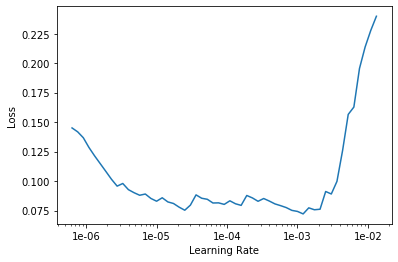

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(2, max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.043256,0.141729,0.027397,02:41
1,0.058254,0.137560,0.027397,02:29


In [15]:
learn.save('stage-2')

In [16]:
learn.load('stage-2');

In [17]:
interp=ClassificationInterpretation.from_learner(learn)

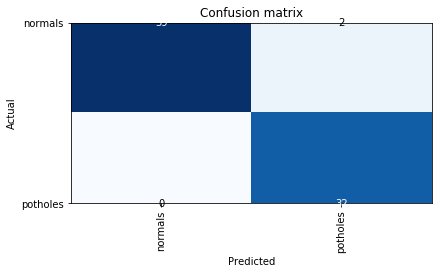

In [18]:
interp.plot_confusion_matrix()

In [19]:
interp.confusion_matrix()

array([[39,  2],
       [ 0, 32]], dtype=int64)

In [20]:
#doc(ClassificationInterpretation)

In [21]:
#nope
#losses,idxs = interp.top_losses()
#top_loss_paths=data.valid_ds.x[idxs]

In [22]:
# nope
#fd = FileDeleter(file_paths=top_loss_paths)

In [23]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [24]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

ImageCleaner does not change anything on disk (neither labels or existence of images). Instead, it creates a 'cleaned.csv' file in your data path from which you need to load your new databunch for the files to changes to be applied.*from docs

In [54]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

In [55]:
db = (ImageList.from_df(df, path)
                   .split_none()
                   .label_from_df()
                   .databunch(bs=24))

C:\Users\Cactuar\Anaconda3\lib\site-packages\fastai\basic_data.py:271: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 310, 500]), torch.Size([3, 331, 500]), torch.Size([3, 300, 500]), torch.Size([3, 262, 500]), torch.Size([3, 348, 500]), torch.Size([3, 283, 425]), torch.Size([3, 340, 500]), torch.Size([3, 333, 500]), torch.Size([3, 281, 500]), torch.Size([3, 333, 500]), torch.Size([3, 312, 500]), torch.Size([3, 332, 500]), torch.Size([3, 333, 500]), torch.Size([3, 333, 500]), torch.Size([3, 375, 500]), torch.Size([3, 354, 500]), torch.Size([3, 335, 500]), torch.Size([3, 300, 450]), torch.Size([3, 186, 500]), torch.Size([3, 263, 500]), torch.Size([3, 281, 500]), torch.Size([3, 375, 500]), torch.Size([3, 281, 500]), torch.Size([3, 280, 500])], [(), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ()]]
  warn(message)


You can deactivate this warning by passing `no_check=True`.


In [56]:
db

ImageDataBunch;

Train: LabelList (265 items)
x: ImageList
Image (3, 375, 500),Image (3, 375, 500),Image (3, 287, 500),Image (3, 333, 500),Image (3, 231, 410)
y: CategoryList
normals,normals,normals,normals,normals
Path: images\road;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: images\road;

Test: None

In [57]:
learn = cnn_learner(db, models.resnet18, metrics=error_rate)
learn = learn.load('stage-1')

In [61]:
#ds, idxs = DatasetFormatter().from_similars(learn, pool=None)

In [62]:
#ImageCleaner(ds, idxs, path, duplicates=True)

In [68]:
#fastai.defaults.device=torch.device('cpu')

In [69]:
df.head()

,name,label
0,normals\00000000.jpg,normals
1,normals\00000002.jpg,normals
2,normals\00000003.jpg,normals
3,normals\00000004.jpg,normals
4,normals\00000007.jpg,normals


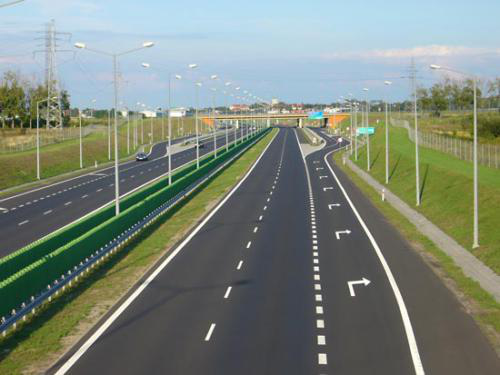

In [70]:
img = open_image(path/'normals/00000000.jpg'); img

In [ ]:
classes=['normals','potholes']
data2=ImageDataBunch.single_from_classes(
    path,
    classes,
    size=224,
).normalize(imagenet_stats)
learn=cnn_learner(data2, models.resnet18)
learn.load('stage-2')

In [73]:
path

WindowsPath('images/road')